 # QC analysis of single cell RNA-seq dataset: This notebook will guide you through the process of quality control analyis on a single-cell RNA sequencing dataset

In [7]:
# Different scenario for original dataset or test dataset
try:
    if DS_test==True:
        DSID = test_DatasetID
        Version = '2'   # the version of your dataset
        DEV = True
    elif len(alt_experiments)==2:
        DSID = DatasetID
        Version = '4'   # the version of your dataset
        your_experiment = "crispr_hashing_harmonized" # A string that is a key known for our desired experimnet that you wish to work on
    else:
        DSID = DatasetID
        Version = '2'   # the version of your dataset
        your_experiment = "main" # A string that is a key known for our desired experimnet that you wish to work on

except TypeError:
    DSID = DatasetID
    Version = '1'   # the version of your dataset
    your_experiment = "raw_qc" # A string that is a key known for our desired experimnet that you wish to work on

New_experiment = "raw_qc" # A string that is a key known for the updated data saved by that that name

In [8]:
## Import Libraries
from __future__ import division
import pandas as pd

#single cell libraries
import scanpy as sc

#general
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [9]:
import sys
sys.path.append("..")
import Templates.tools.DatasetDB as DB
import Templates.tools.RNA_Seq_QC as rnaqc
import Templates.tools.scProc as proc
try:
    import Templates.tools.rapids_modified as rp
except ImportError:
        pass

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Check if GPU device is available 

In [11]:
GPU = rnaqc.pipeline_has_gpu()

In [12]:
GPU

True

## Instantiate a dataset object given our dataset info

In [13]:
DS = DB.DATASET(DSID, DEV, title=title, description=description, name_space=name_space, organism=organism,
                       sources=sources, tech_name=tech_name, author=author)

In [14]:
adata, adatas = DS.load_dataset(Version, your_experiment, Corr=False)


13:41:58 -> Collating dataset: 'DS000015324' metadata.
13:41:58 -> Retrieving all project: 'DS000015324@4' metadata.

13:41:58 -> Reading: 'DS000015324'.

13:41:58 -> Reading: 'DS000015324 -> Experiment: main'.

13:41:58 -> Reading: 'DS000015324 -> Experiment: main -> Alt. Exp.: crispr'.

13:41:59 -> Reading: 'DS000015324 -> Experiment: main -> Alt. Exp.: hashing'.

13:42:00 -> Reading: 'DS000015324 -> Experiment: crispr_hashing_harmonized'.

13:42:00 -> Reading: 'DS000015324 -> Experiment: crispr_hashing_harmonized -> Alt. Exp.: crispr'.

13:42:01 -> Reading: 'DS000015324 -> Experiment: crispr_hashing_harmonized -> Alt. Exp.: hashing'.


In [15]:
adata = rnaqc.load_data(adata,  alt_experiments)

In [11]:
adata.obs.head()

,Sample,Barcode,DemuxType_hashing,DemuxAssignment_hashing
SAM24437819_rep1-AAACCCAAGAGAGGTA,SAM24437819_rep1,AAACCCAAGAGAGGTA,doublet,"E3,D7,D2,D6"
SAM24437819_rep1-AAACCCAAGGAGTCTG,SAM24437819_rep1,AAACCCAAGGAGTCTG,doublet,"D5,D6"
SAM24437819_rep1-AAACCCAAGGTGAGCT,SAM24437819_rep1,AAACCCAAGGTGAGCT,singlet,SW1417_Control
SAM24437819_rep1-AAACCCAAGTAGTGCG,SAM24437819_rep1,AAACCCAAGTAGTGCG,singlet,SKCO1_Day6
SAM24437819_rep1-AAACCCACAAGTTGGG,SAM24437819_rep1,AAACCCACAAGTTGGG,doublet,"D7,E3"


In [12]:
adata.var.head()

,ID,Symbol,Type
Symbol,,,
3xLinker,3xLinker_3xLinker,3xLinker_3xLinker,Gene Expression
MIR1302-2HG,GRCh38-2020-A_ENSG00000243485,GRCh38-2020-A_MIR1302-2HG,Gene Expression
FAM138A,GRCh38-2020-A_ENSG00000237613,GRCh38-2020-A_FAM138A,Gene Expression
OR4F5,GRCh38-2020-A_ENSG00000186092,GRCh38-2020-A_OR4F5,Gene Expression
AL627309.1,GRCh38-2020-A_ENSG00000238009,GRCh38-2020-A_AL627309.1,Gene Expression


## Mapping Rate information

In [ ]:
combined_df,agg,agg_percentage = rnaqc.Mapping_reads_info(Mapping_rate)

In [ ]:
combined_df

In [ ]:
#Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
agg.plot(kind='barh', ax=ax1, stacked=False, color=['midnightblue', 'blue', 'deepskyblue'], legend=False)
ax1.set_xlabel('Read Count')
agg_percentage.plot(kind='barh', ax=ax2, stacked=False, color=['midnightblue', 'blue', 'deepskyblue'])
ax2.set_xlabel('%Read Count')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.suptitle('Mapping Rate', fontsize=25)
plt.show()

## Doublet information

In [13]:
rnaqc.doublet_counter(adata)

,Cell counts
total Cells,47388
cells after keeping singlets by hashing,34383


In [ ]:
rnaqc.Ven_maker(adata, title)

### Sumarize counts

In [14]:
cnts_before = rnaqc.Summerize_counts(adata, groupby)

In [15]:
cnts_before

,cnt,pct
Sample,,
SAM24437819_rep1,23020,100.0
SAM24437819_rep2,24368,100.0


### calculate qc metrics

In [16]:
adata = proc.calc_qc_metrics(adata, organism)

In [17]:
LOWER,UPPER = rnaqc.upper_lower_limits(adata, groupby)

In [18]:
LOWER

,n_genes_by_counts,total_counts,pct_counts_mt,pct_counts_ribo
SAM24437819_rep1,-729.5,-5397.750,-1.177597,8.454399
SAM24437819_rep2,-797.5,-5320.375,-1.095188,7.736527


In [19]:
UPPER

,n_genes_by_counts,total_counts,pct_counts_mt,pct_counts_ribo
SAM24437819_rep1,6386.5,22094.250,10.610987,47.477501
SAM24437819_rep2,6246.5,21104.625,10.997108,47.129985


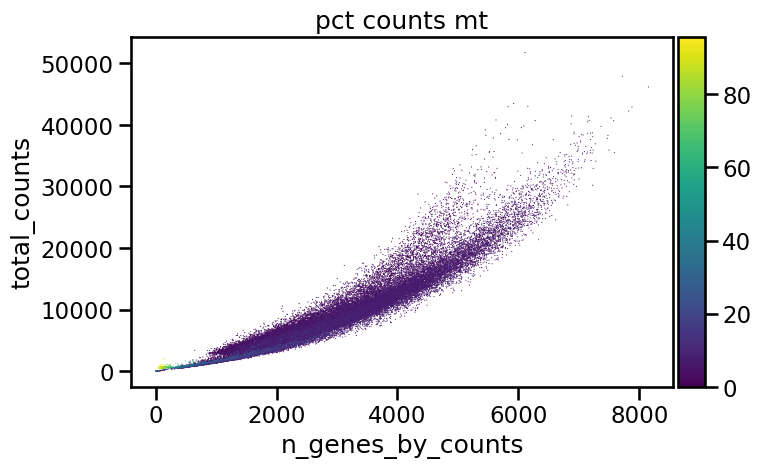

In [20]:
sc.pl.scatter(adata, 'n_genes_by_counts', 'total_counts', color='pct_counts_mt') 

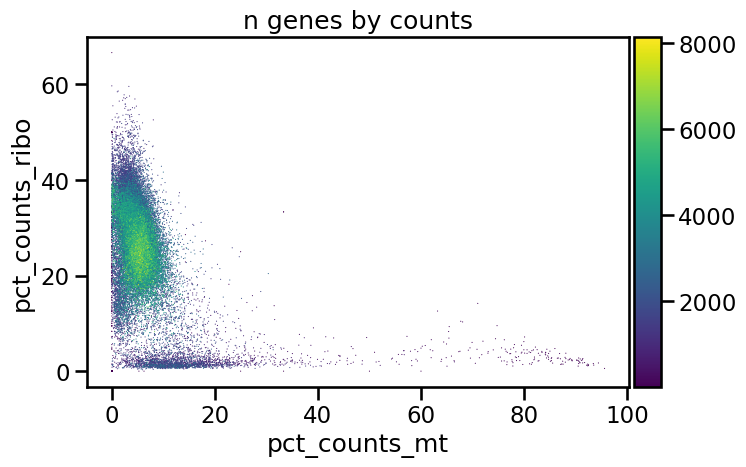

In [21]:
sc.pl.scatter(adata, 'pct_counts_mt', 'pct_counts_ribo', color='n_genes_by_counts')

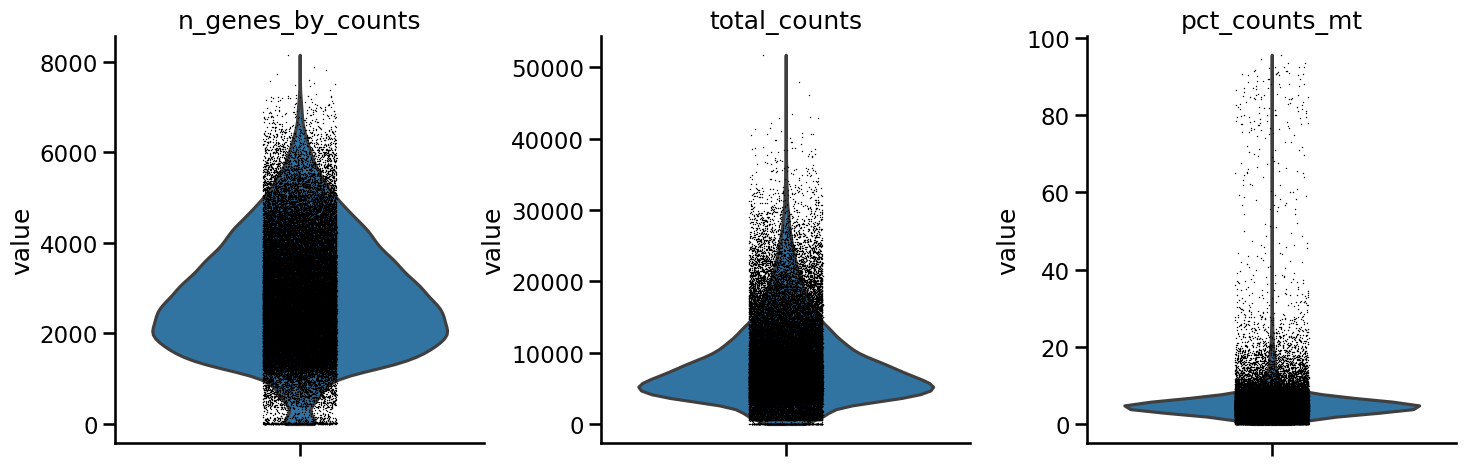

In [22]:
sc.pl.violin(
    adata, 
    [
     'n_genes_by_counts', 
     'total_counts', 
     'pct_counts_mt'
     ],
    multi_panel=True
)

In [23]:
aggr = rnaqc.aggregation(adata, groupby, None, 'before')

In [24]:
adata.obs.head()

,Sample,Barcode,DemuxType_hashing,DemuxAssignment_hashing,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
SAM24437819_rep1-AAACCCAAGAGAGGTA,SAM24437819_rep1,AAACCCAAGAGAGGTA,doublet,"E3,D7,D2,D6",3964,16353,433,2.647832,5336,32.630098
SAM24437819_rep1-AAACCCAAGGAGTCTG,SAM24437819_rep1,AAACCCAAGGAGTCTG,doublet,"D5,D6",4742,16893,1021,6.043924,4535,26.845439
SAM24437819_rep1-AAACCCAAGGTGAGCT,SAM24437819_rep1,AAACCCAAGGTGAGCT,singlet,SW1417_Control,1186,1918,346,18.039625,32,1.668405
SAM24437819_rep1-AAACCCAAGTAGTGCG,SAM24437819_rep1,AAACCCAAGTAGTGCG,singlet,SKCO1_Day6,2888,8414,350,4.159734,2623,31.174233
SAM24437819_rep1-AAACCCACAAGTTGGG,SAM24437819_rep1,AAACCCACAAGTTGGG,doublet,"D7,E3",2798,7454,18,0.241481,1903,25.529917


## Instantiate a RapidsSingleCellPipeline object given our AnnData to prepare RAPIDS environment for other steps

In [25]:
RP = rp.RapidsSingleCellPipeline(adata)

## Notice: 
- **RP._adata is adata before filtering** 
- **RP.adata_ is adata after filtering**
- **Rp.adata is adata after normalization (and highly variable genes selected)**

In [26]:
max_cells = None
cell_batch_size = 100000
gene_batch_size = 1200
target_sum = 1e4
n_top_genes = 2000
counts_layer = "counts"
batch_key = "DemuxAssignment_hashing"

## Apply filter using GPU

In [27]:
if GPU:
    RP.filter_data(
    groupby,
    min_genes=min_genes,
    max_genes=max_genes,
    max_cells=max_cells,
    cell_batch_size=cell_batch_size,
    min_cells=min_cells,
    gene_batch_size=gene_batch_size,
        ribo=ribo, 
        doublets=doublets,
        pct_mt=pct_mt, 
        total_counts=total_counts
)

starting with 47388 cells
Filtering cells.
Processed 0 cells..
Filtering genes.
Completed preprocessing.
Calculating upper outliers
Now 46252 cells after filtering max genes 
Calculating upper outliers
Now 44105 cells after filtering pct mt 
Calculating upper outliers
Now 42426 cells after filtering total counts 
Now 41055 cells after filtering pct ribo 
Now 30593 cells after keeping singlets by hashing
Now 30593 cells after keeping singlets by gRNA
Preprocessing took 38.24150776863098 seconds


In [42]:
RP._adata

AnnData object with n_obs × n_vars = 47388 × 36603
    obs: 'Sample', 'Barcode', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'ID', 'Symbol', 'Type', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'genome', 'modality', 'uns_dict', 'uid', 'adt_summary', '.internal'
    layers: 'counts'

In [30]:
RP.adata_

View of AnnData object with n_obs × n_vars = 30593 × 29767
    obs: 'Sample', 'Barcode', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'ID', 'Symbol', 'Type', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

In [45]:
RP._adata.obs["qc_pass"] = RP._adata.obs.index.isin(RP.adata_.obs.index)

In [46]:
RP._adata.obs

,Sample,Barcode,DemuxType_hashing,DemuxAssignment_hashing,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,qc_pass
SAM24437819_rep1-AAACCCAAGAGAGGTA,SAM24437819_rep1,AAACCCAAGAGAGGTA,doublet,"E3,D7,D2,D6",3964,16353,433,2.647832,5336,32.630098,False
SAM24437819_rep1-AAACCCAAGGAGTCTG,SAM24437819_rep1,AAACCCAAGGAGTCTG,doublet,"D5,D6",4742,16893,1021,6.043924,4535,26.845439,False
SAM24437819_rep1-AAACCCAAGGTGAGCT,SAM24437819_rep1,AAACCCAAGGTGAGCT,singlet,SW1417_Control,1186,1918,346,18.039625,32,1.668405,False
SAM24437819_rep1-AAACCCAAGTAGTGCG,SAM24437819_rep1,AAACCCAAGTAGTGCG,singlet,SKCO1_Day6,2888,8414,350,4.159734,2623,31.174233,True
SAM24437819_rep1-AAACCCACAAGTTGGG,SAM24437819_rep1,AAACCCACAAGTTGGG,doublet,"D7,E3",2798,7454,18,0.241481,1903,25.529917,False
...,...,...,...,...,...,...,...,...,...,...,...
SAM24437819_rep2-TTTGTTGTCAGACTGT,SAM24437819_rep2,TTTGTTGTCAGACTGT,singlet,SW1417_Day10,1678,4291,69,1.608017,1360,31.694244,True
SAM24437819_rep2-TTTGTTGTCGACATTG,SAM24437819_rep2,TTTGTTGTCGACATTG,doublet,"D5,D2",2545,8346,125,1.497723,2657,31.835610,False
SAM24437819_rep2-TTTGTTGTCGGAGTAG,SAM24437819_rep2,TTTGTTGTCGGAGTAG,singlet,RCM1_Control,1695,4702,322,6.848150,1841,39.153552,True
SAM24437819_rep2-TTTGTTGTCTCTAAGG,SAM24437819_rep2,TTTGTTGTCTCTAAGG,NaN,NaN,22,22,2,9.090909,2,9.090909,False


## Apply filter uisng CPU

In [47]:
if GPU==False:
    adata = proc.filter_adata(
    adata, 
    groupby, 
    min_cells, 
    min_genes, 
    ribo, 
    doublets=doublets, pct_mt=pct_mt)

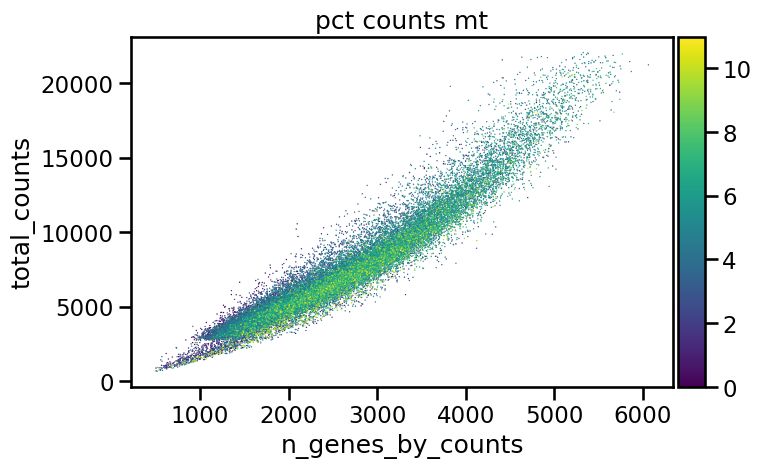

In [48]:
sc.pl.scatter(RP.adata_, 'n_genes_by_counts', 'total_counts', color='pct_counts_mt')

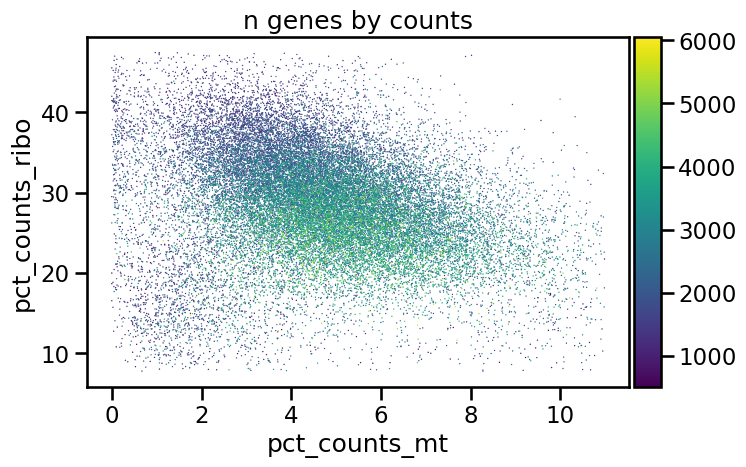

In [49]:
sc.pl.scatter(RP.adata_, 'pct_counts_mt', 'pct_counts_ribo', color='n_genes_by_counts')

In [50]:
aggr = rnaqc.aggregation(RP.adata_, groupby,aggr, 'after')

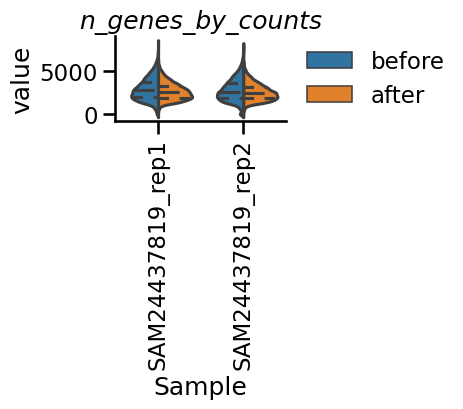

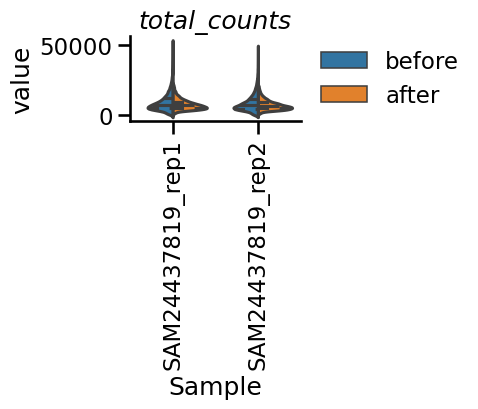

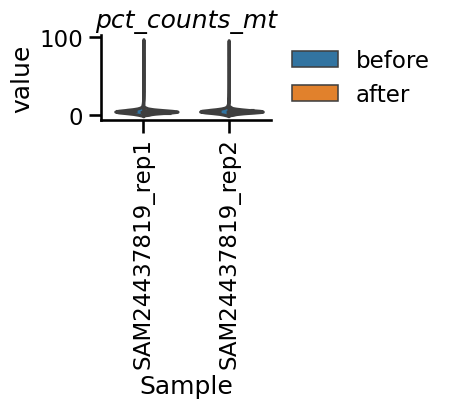

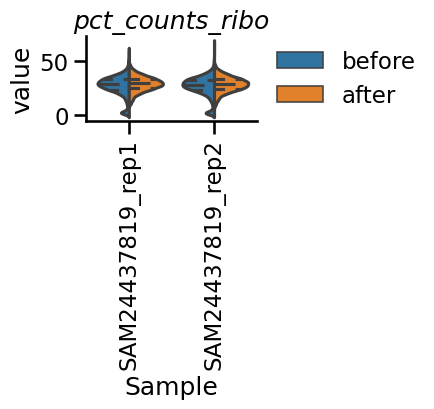

In [51]:
#QC plots before and after
for k in ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo']:
    proc.plotQCSplit(aggr, groupby, k)

In [52]:
cnts_after = rnaqc.Summerize_counts(RP.adata_,groupby)

In [53]:
cnts_after

,cnt,pct
Sample,,
SAM24437819_rep1,15103,100.0
SAM24437819_rep2,15490,100.0


In [54]:
proc.aggCnts(cnts_before, cnts_after)

,before,after,pct left
Sample,,,
SAM24437819_rep1,23020,15103,65.6
SAM24437819_rep2,24368,15490,63.6


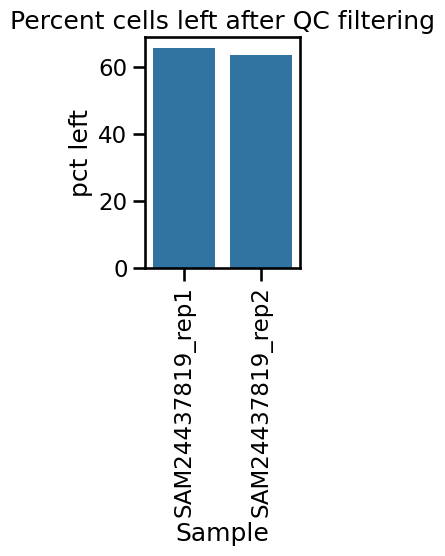

In [55]:
proc.plot_cell_left(cnts_before, cnts_after, groupby)

## Run Normalize -> HGV -> PCA -> kNN -> Leiden -> UMAP 

In [56]:
RP.proc(n_top_genes, norm=True, scale=True, regress=False, embedding=True, n_pcs=50, 
        n_neighbors=10, knn_n_pcs=30, batch_key=None)

normalizing
Processed 0 cells..
normalizing data.
Completed preprocessing.
Preprocessing took 1.5885562896728516 seconds
selecting highly variable genes
Filtering to highly variable genes.
Processed 0 genes..
Processed 1200 genes..
Processed 2400 genes..
Processed 3600 genes..
Processed 4800 genes..
Processed 6000 genes..
Processed 7200 genes..
Processed 8400 genes..
Processed 9600 genes..
Processed 10800 genes..
Processed 12000 genes..
Processed 13200 genes..
Processed 14400 genes..
Processed 15600 genes..
Processed 16800 genes..
Processed 18000 genes..
Processed 19200 genes..
Processed 20400 genes..
Processed 21600 genes..
Processed 22800 genes..
Processed 24000 genes..
Processed 25200 genes..
Processed 26400 genes..
Processed 27600 genes..
Processed 28800 genes..
Completed preprocessing.
Converting sparse GPU array to dense GPU array.
Preprocessing took 5.9908058643341064 seconds
scaling
scaling took 1.0623373985290527 seconds
computing PCA
PCA took 8.232844591140747 seconds
kNN too

## Batch Correction

In [40]:
#RP.run_scvi(counts_layer = "counts", batch_key = "DemuxAssignment_hashing")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 309/309: 100%|██████████| 309/309 [07:32<00:00,  1.45s/it, loss=274, v_num=1]

`Trainer.fit` stopped: `max_epochs=309` reached.


Epoch 309/309: 100%|██████████| 309/309 [07:32<00:00,  1.46s/it, loss=274, v_num=1]
Scvi Training took 454.9004805088043 seconds


In [42]:
#RP.adata.obsm["X_scVI"]

array([[-0.2893079 ,  0.05997817, -1.733546  , ..., -0.24163666,
         0.25549027, -1.2048367 ],
       [-0.11426353,  0.9252442 , -0.38236266, ..., -0.81843317,
         0.78507215, -0.02686357],
       [ 0.22840934, -0.08331221, -1.3457441 , ..., -0.26384586,
         0.5432156 , -0.05745783],
       ...,
       [-0.35611594, -0.7678157 , -0.1376851 , ...,  1.047943  ,
         0.6075516 , -0.44938573],
       [ 0.1718953 ,  0.49348795,  0.27880347, ...,  0.14000285,
        -0.262189  , -0.6706159 ],
       [ 0.26775905,  0.2283631 , -0.13624744, ..., -0.85562664,
         0.06128341, -0.5419377 ]], dtype=float32)

## Plot PCA UMAP

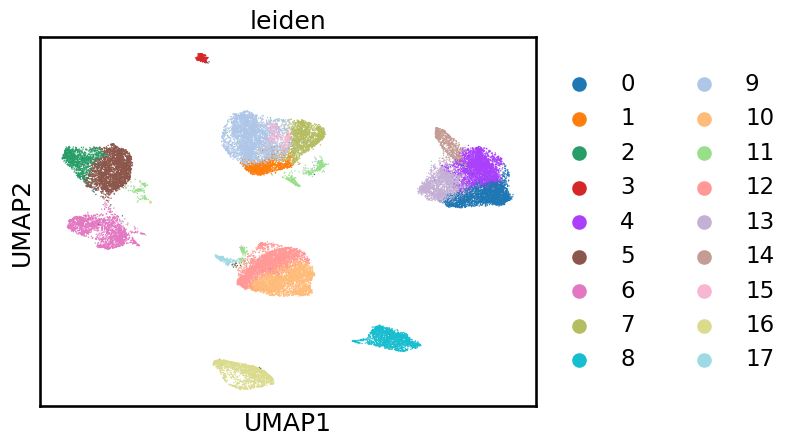

In [57]:
if GPU:
    sc.pl.umap(RP.adata, color="leiden")

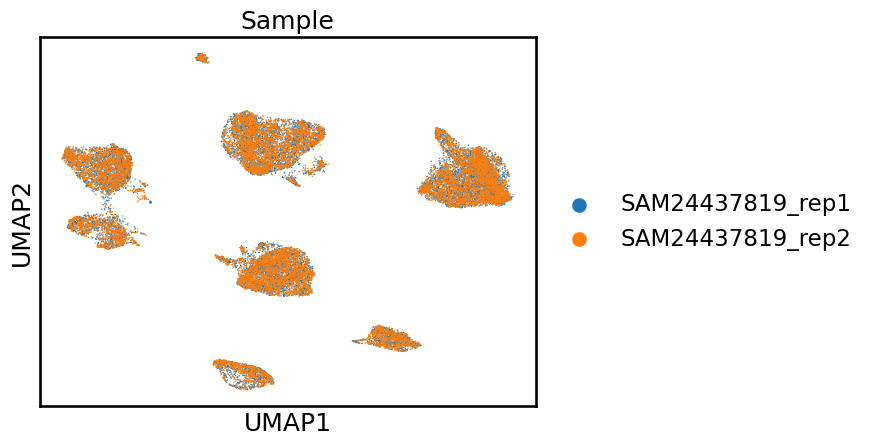

In [58]:
if GPU:
    sc.pl.umap(RP.adata, color='10Xrun')

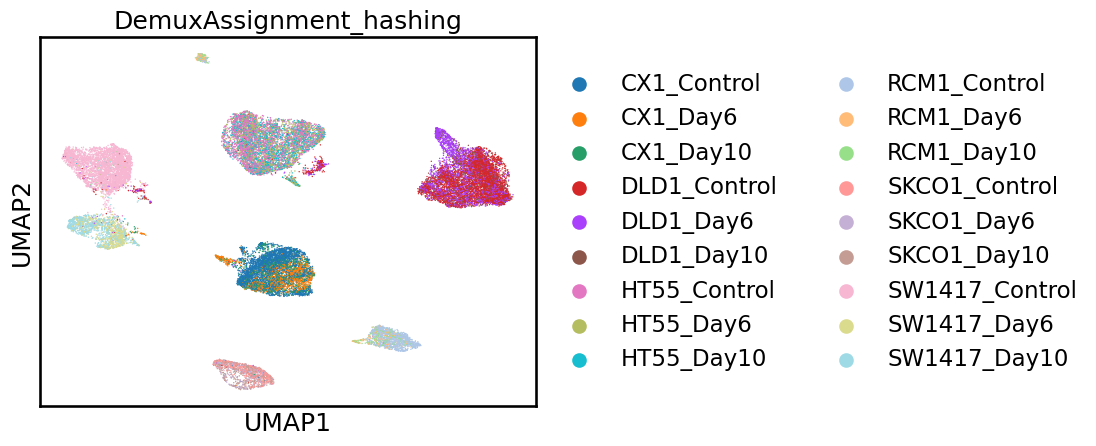

In [59]:
if GPU:
    sc.pl.umap(RP.adata, color="DemuxAssignment_hashing")

In [60]:
#This is just to quickly check how the data looks. Cell cycle scores are added to main adata object, but normalized and processed object is not saved
if GPU==False:
    adata_tmp = adata.copy()

In [61]:
if GPU==False:
    adata_tmp = proc.proc(adata_tmp, 'auto', norm=True, scale=True, regress=False, embedding=True)
    sc.pl.umap(adata_tmp, color=groupby)

## Add score cell cycle

In [68]:
if organism=='human':
    fcc =  '/gstore/data/cbfunge/data/CellCycleGenes/Homo_sapiens.csv'
elif organism == 'mouse':
    fcc = '/gstore/data/cbfunge/data/CellCycleGenes/Mus_musculus.csv'
    
if GPU:
    proc.compute_cellCycleScores(RP._adata, fcc)
else:
    proc.compute_cellCycleScores(adata_tmp, fcc)

In [70]:
RP._adata

AnnData object with n_obs × n_vars = 47388 × 36603
    obs: 'Sample', 'Barcode', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'qc_pass', 'S_score', 'G2M_score', 'phase'
    var: 'ID', 'Symbol', 'Type', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'genome', 'modality', 'uns_dict', 'uid', 'adt_summary', '.internal'
    layers: 'counts'

In [65]:
RP.adata

AnnData object with n_obs × n_vars = 30593 × 2000
    obs: 'Sample', 'Barcode', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    uns: 'neighbors', 'umap', 'leiden_colors', 'Sample_colors', 'DemuxAssignment_hashing_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [66]:
if GPU==False:
    adata.obs['phase'] = adata_tmp.obs['phase']
    adata.obs['G2M_score'] = adata_tmp.obs['G2M_score']
    adata.obs['S_score'] = adata_tmp.obs['S_score']
    adata.obs

In [50]:
if GPU==False:
    sc.pl.umap(adata_tmp, color='phase')

In [71]:
adatas

{'hashing': AnnData object with n_obs × n_vars = 47388 × 96
     uns: '.internal'
     layers: 'counts'}

In [85]:
adatas_updated = adatas.copy()
if GPU:
    adata_updated = RP._adata.copy()
else:
    adata_updated = adata.copy()   

In [86]:
adata_updated

AnnData object with n_obs × n_vars = 47388 × 36603
    obs: 'Sample', 'Barcode', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'qc_pass', 'S_score', 'G2M_score', 'phase'
    var: 'ID', 'Symbol', 'Type', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'genome', 'modality', 'uns_dict', 'uid', 'adt_summary', '.internal'
    layers: 'counts'

In [87]:
adatas_updated

{'hashing': AnnData object with n_obs × n_vars = 47388 × 96
     uns: '.internal'
     layers: 'counts'}

### Write h5ad version on the disk

In [73]:
# If you wish to write on the disk
adata_updated.var.index.name = None
adata_updated.write_h5ad(raw_qc)

## Write h5ad file with embedings for Energy Distance analaysis

In [82]:
if GPU:
    RP.adata_.obsp = RP.adata.obsp.copy()
    RP.adata_.obsm = RP.adata.obsm.copy()
else:
    adata.obsp = adata_tmp.obsp.copy()
    adata.obsm = adata_tmp.obsm.copy()

In [83]:
if GPU:
    adata_embedding = RP.adata_.copy()
else:
    adata_embedding = adata.copy()  

In [84]:
adata_embedding.write_h5ad(raw_embedding)

## Update the dataset with new experiment "raw_qc"

In [88]:
"""
if DS_test==False:
    dsid, version = DS.update_dataset(New_experiment, adata_updated, adatas_updated, test=False)
else:    
    dsid, version = DS.update_another_dataset(test_DatasetID, True, 1, New_experiment, adata_updated, adatas_updated, test=True)
"""


12:00:50 -> Collating dataset: 'DS000015492' metadata.
12:00:50 -> Retrieving all project: 'DS000015492@1' metadata.

12:00:50 -> Reading: 'DS000015492'.

12:00:50 -> Reading: 'DS000015492 -> Experiment: main'.

12:00:50 -> Reading: 'DS000015492 -> Experiment: main -> Alt. Exp.: hashing'.



PYDSDB:INFO: Experiment already contained metadata, overwriting.

PYDSDB:INFO: Experiment already contained metadata, overwriting.


Retrieving cached token data.
Successfully authenticated.
12:01:21 -> Retrieving all project: 'DS000015492@latest' metadata.
12:01:21 -> Retrieving all project: 'DS000015492@2' metadata.
12:01:21 -> Collating and validating project resources.
12:01:22 -> Attempting upload.


100%|████████████████████████████████████████| 46/46 [00:15<00:00,  3.02file/s]


Clearing upload info.
12:01:50 -> Upload completed.
Processing...
Processing...
Processing...
Processing...
Upload successful, your DSID is 'DS000015492' and version is: '3'. Also written to 'upload_info.json' in staging dir.


In [89]:
#dsid, version

('DS000015492', '3')